In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [20]:
X = np.random.rand(100, 1)*10
y =( 2* X**2 -3*X+1 + 15 *np.random.randn(100, 1)).reshape(-1,)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
y_train.shape

(80,)

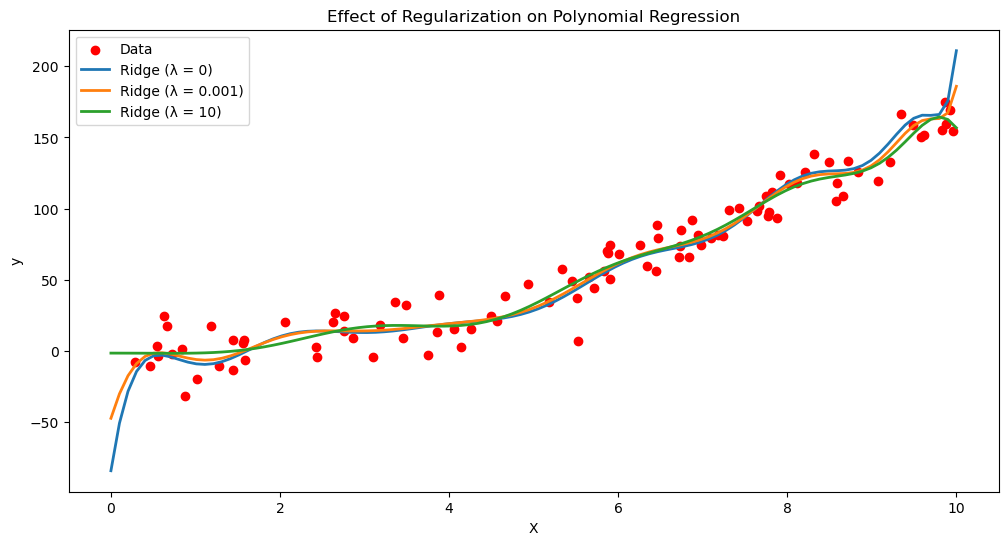

In [17]:
# Define the range of regularization parameters (lambda)
lambda_values = [0, 0.001, 10]
plt.figure(figsize = (12, 6))
plt.scatter(X, y, label = "Data", c = "r")


# Polynomial degree and feature transformation
degree = 15
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Iterate through different lambda values and plot the corresponding model curves
for lam in lambda_values:
    model = make_pipeline(PolynomialFeatures(degree),Ridge(alpha=lam))
    model.fit(X, y)
    
    X_test = np.linspace(0, 10, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)
    
    plt.plot(X_test, y_pred, label=f'Ridge (λ = {lam})', linewidth=2)
    
    
plt.title('Effect of Regularization on Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

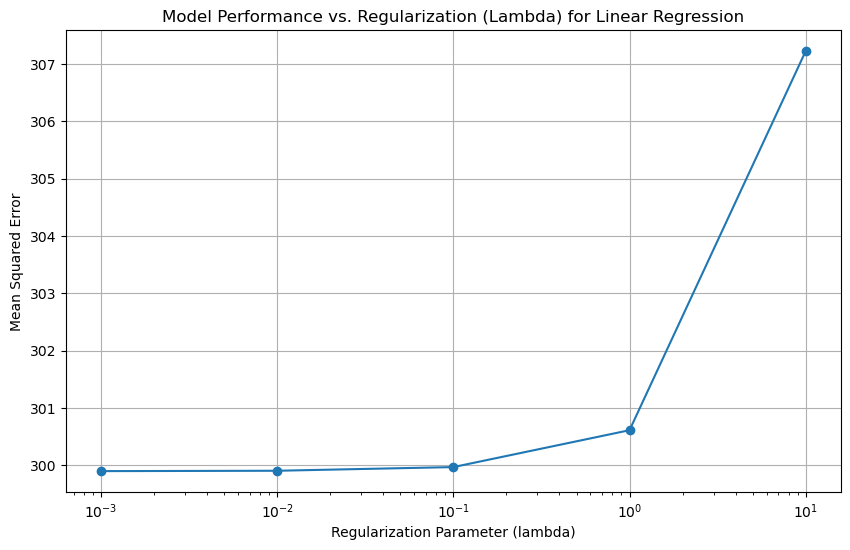

In [22]:
# Define a range of regularization parameters (lambda)
reg_params = [0.001, 0.01, 0.1, 1, 10]

# Initialize lists to store the mean squared error for each model
mse_scores = []

# Train and evaluate models with different regularization parameters
for reg_param in reg_params:
    # Create and train the Ridge regression model with the current lambda
    model = Ridge(alpha=reg_param)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and store the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(reg_params, mse_scores, marker='o')
plt.title('Model Performance vs. Regularization (Lambda) for Linear Regression')
plt.xlabel('Regularization Parameter (lambda)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()
    
        
